## Import data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.11.0


In [4]:
import string
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
#from keras.backend.tensorflow_backend import set_session
import keras
import sys, time, os, warnings 
warnings.filterwarnings("ignore")
import re

import numpy as np
import pandas as pd 
from PIL import Image
import pickle
from collections import Counter
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, BatchNormalization
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
#from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.utils import shuffle
from keras.applications.vgg16 import VGG16, preprocess_input

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [5]:
#imports 
import os
from collections import Counter
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as T

import torch


import torchvision.models as models
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as T

## Loading data

In [6]:
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# To remove punctuations
def remove_punctuation(text_original):
    text_no_punctuation = text_original.translate(string.punctuation)
    return(text_no_punctuation)


# To remove single characters
def remove_single_character(text):
    text_len_more_than1 = ""
    for word in text.split():
        if len(word) > 1:
            text_len_more_than1 += " " + word
    return(text_len_more_than1)

# To remove numeric values
def remove_numeric(text,printTF=False):
    text_no_numeric = ""
    for word in text.split():
        isalpha = word.isalpha()
        if printTF:
            print("    {:10} : {:}".format(word,isalpha))
        if isalpha:
            text_no_numeric += " " + word
    return(text_no_numeric)

In [7]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
 ! kaggle datasets download -d sayanf/flickr8k

 98% 1.02G/1.04G [00:08<00:00, 113MB/s]
100% 1.04G/1.04G [00:08<00:00, 128MB/s]


In [9]:
! unzip flickr8k.zip


Streaming output truncated to the last 5000 lines.
  inflating: Flickr8k_Dataset/2846843520_b0e6211478.jpg  
  inflating: Flickr8k_Dataset/2847514745_9a35493023.jpg  
  inflating: Flickr8k_Dataset/2847615962_c330bded6e.jpg  
  inflating: Flickr8k_Dataset/2847859796_4d9cb0d31f.jpg  
  inflating: Flickr8k_Dataset/2848266893_9693c66275.jpg  
  inflating: Flickr8k_Dataset/2848571082_26454cb981.jpg  
  inflating: Flickr8k_Dataset/2848895544_6d06210e9d.jpg  
  inflating: Flickr8k_Dataset/2848977044_446a31d86e.jpg  
  inflating: Flickr8k_Dataset/2849194983_2968c72832.jpg  
  inflating: Flickr8k_Dataset/2850719435_221f15e951.jpg  
  inflating: Flickr8k_Dataset/2851198725_37b6027625.jpg  
  inflating: Flickr8k_Dataset/2851304910_b5721199bc.jpg  
  inflating: Flickr8k_Dataset/2851931813_eaf8ed7be3.jpg  
  inflating: Flickr8k_Dataset/2852982055_8112d0964f.jpg  
  inflating: Flickr8k_Dataset/285306009_f6ddabe687.jpg  
  inflating: Flickr8k_Dataset/2853205396_4fbe8d7a73.jpg  
  inflating: Flickr8k_

In [10]:
from os import listdir
## The location of the Flickr8K_ photos
image_dir = '/content/Flickr8k_Dataset/'
images = listdir(image_dir)

## The location of the caption file
descriptions_dir = '/content/Flickr8k_text/Flickr8k.token.txt'

print("The number of jpg flies in Flicker8k: {}".format(len(images)))

The number of jpg flies in Flicker8k: 8091


In [11]:
## read in the Flickr caption data
text = load_doc(descriptions_dir)
print(text[:330])

1000268201_693b08cb0e.jpg#0	A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg#1	A girl going into a wooden building .
1000268201_693b08cb0e.jpg#2	A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg#3	A little girl climbing the stairs to her playhouse .
10002


In [157]:
def make_dataset(text):
  df = []
  for sentences in text.split('\n'):
      splitted = sentences.split('\t')
      if len(splitted) == 1:
          continue
      w = splitted[0].split("#")
      df.append(w + [splitted[1].lower()])
  return df

In [158]:
df = make_dataset(text)

In [ ]:
df

In [14]:
data = pd.DataFrame(df,columns=["filename","index","caption"])
# Reordering columns for better readability
data = data.reindex(columns =['index','filename','caption'])

In [15]:
def invalid_filename_check(data):
  for filenames in data["filename"]:
    found = re.search("(.(jpg)$)", filenames)
    if (found):
        pass
    else:
        print("Error file: {}".format(filenames))

In [16]:
invalid_filename_check(data)

Error file: 2258277193_586949ec62.jpg.1
Error file: 2258277193_586949ec62.jpg.1
Error file: 2258277193_586949ec62.jpg.1
Error file: 2258277193_586949ec62.jpg.1
Error file: 2258277193_586949ec62.jpg.1


In [17]:
data = data[data['filename'] != '2258277193_586949ec62.jpg.1']
data.shape

(40455, 3)

In [18]:
def create_vocabulary(data):
  vocab = []
  for captions in data.caption.values:
    vocab.extend(captions.split())
  print("Vocabulary Size : {}".format(len(set(vocab))))
  return vocab

In [19]:
vocabulary = create_vocabulary(data)

Vocabulary Size : 8918


In [20]:
def text_clean(text_original):
    text = remove_punctuation(text_original)
    text = remove_single_character(text)
    text = remove_numeric(text)
    return(text)
    
for i, caption in enumerate(data.caption.values):
    newcaption = text_clean(caption)
    data["caption"].iloc[i] = newcaption

In [21]:
clean_vocabulary = create_vocabulary(data)

Vocabulary Size : 8357


In [22]:
def preprocess_images(data):
  all_img_name_vector = []

  for filenames in data["filename"]:
      full_image_path = image_dir+"/"+ filenames
      all_img_name_vector.append(full_image_path)
  return all_img_name_vector
all_img_name_vector = preprocess_images(data)
all_img_name_vector[:10]

['/content/Flickr8k_Dataset//1000268201_693b08cb0e.jpg',
 '/content/Flickr8k_Dataset//1000268201_693b08cb0e.jpg',
 '/content/Flickr8k_Dataset//1000268201_693b08cb0e.jpg',
 '/content/Flickr8k_Dataset//1000268201_693b08cb0e.jpg',
 '/content/Flickr8k_Dataset//1000268201_693b08cb0e.jpg',
 '/content/Flickr8k_Dataset//1001773457_577c3a7d70.jpg',
 '/content/Flickr8k_Dataset//1001773457_577c3a7d70.jpg',
 '/content/Flickr8k_Dataset//1001773457_577c3a7d70.jpg',
 '/content/Flickr8k_Dataset//1001773457_577c3a7d70.jpg',
 '/content/Flickr8k_Dataset//1001773457_577c3a7d70.jpg']

In [23]:
def preprocess_captions(data):
  total_captions = []

  for caption  in data["caption"].astype(str):
      caption = '<start> ' + caption+ ' <end>'
      total_captions.append(caption)
  return total_captions
total_captions = preprocess_captions(data)
total_captions[:10]

['<start>  child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start>  girl going into wooden building <end>',
 '<start>  little girl climbing into wooden playhouse <end>',
 '<start>  little girl climbing the stairs to her playhouse <end>',
 '<start>  little girl in pink dress going into wooden cabin <end>',
 '<start>  black dog and spotted dog are fighting <end>',
 '<start>  black dog and dog playing with each other on the road <end>',
 '<start>  black dog and white dog with brown spots are staring at each other in the street <end>',
 '<start>  two dogs of different breeds looking at each other on the road <end>',
 '<start>  two dogs on pavement moving toward each other <end>']

In [24]:
ten_images = all_img_name_vector[:50] # Each image repeats 5 times in dataset
unique_images = np.unique(ten_images)
print(unique_images)

['/content/Flickr8k_Dataset//1000268201_693b08cb0e.jpg'
 '/content/Flickr8k_Dataset//1001773457_577c3a7d70.jpg'
 '/content/Flickr8k_Dataset//1002674143_1b742ab4b8.jpg'
 '/content/Flickr8k_Dataset//1003163366_44323f5815.jpg'
 '/content/Flickr8k_Dataset//1007129816_e794419615.jpg'
 '/content/Flickr8k_Dataset//1007320043_627395c3d8.jpg'
 '/content/Flickr8k_Dataset//1009434119_febe49276a.jpg'
 '/content/Flickr8k_Dataset//1012212859_01547e3f17.jpg'
 '/content/Flickr8k_Dataset//1015118661_980735411b.jpg'
 '/content/Flickr8k_Dataset//1015584366_dfcec3c85a.jpg']


In [25]:
print("Total Images : " + str(len(all_img_name_vector)))
print("Total Captions : " + str(len(total_captions)))

Total Images : 40455
Total Captions : 40455


In [26]:
def data_limiter(num,total_captions,all_img_name_vector):
  # Shuffle captions and image_names together
  train_captions, img_name_vector = shuffle(total_captions,all_img_name_vector,random_state=1)
  train_captions = train_captions[:num]
  img_name_vector = img_name_vector[:num]
  return train_captions,img_name_vector

In [27]:
train_captions,img_name_vector = data_limiter(40000,total_captions,all_img_name_vector)

In [28]:

print("Total Captions = {0} , Total images = {1}".format(len(train_captions),len(img_name_vector)))

Total Captions = 40000 , Total images = 40000


In [29]:
from pickle import dump

# save to file
dump(train_captions, open('/content/drive/MyDrive/Colab Notebooks/Image Captioning Attention/captions.pkl', 'wb'))
dump(img_name_vector, open('/content/drive/MyDrive/Colab Notebooks/Image Captioning Attention/img_names.pkl', 'wb'))

In [30]:
train_captions = load(open('/content/drive/MyDrive/Colab Notebooks/Image Captioning Attention/captions.pkl', 'rb'))
img_name_vector = load(open('/content/drive/MyDrive/Colab Notebooks/Image Captioning Attention/img_names.pkl', 'rb'))

In [31]:

print("Total Captions = {0} , Total images = {1}".format(len(train_captions),len(img_name_vector)))

Total Captions = 40000 , Total images = 40000


In [32]:
def img_shape_finder(image):
  img= plt.imread(image)

  print("Shape of the image ==> {0} is ==> {1}".format(image.split('/')[0],img.shape))

In [33]:
img_list=[]
for i in range(20):
  img_list.append(img_name_vector[i])

In [34]:
for j in img_list:
  img_shape_finder(j)

Shape of the image ==>  is ==> (500, 375, 3)
Shape of the image ==>  is ==> (375, 500, 3)
Shape of the image ==>  is ==> (375, 500, 3)
Shape of the image ==>  is ==> (400, 500, 3)
Shape of the image ==>  is ==> (274, 500, 3)
Shape of the image ==>  is ==> (375, 500, 3)
Shape of the image ==>  is ==> (334, 500, 3)
Shape of the image ==>  is ==> (500, 354, 3)
Shape of the image ==>  is ==> (500, 333, 3)
Shape of the image ==>  is ==> (350, 500, 3)
Shape of the image ==>  is ==> (375, 500, 3)
Shape of the image ==>  is ==> (375, 500, 3)
Shape of the image ==>  is ==> (322, 500, 3)
Shape of the image ==>  is ==> (375, 500, 3)
Shape of the image ==>  is ==> (500, 333, 3)
Shape of the image ==>  is ==> (333, 500, 3)
Shape of the image ==>  is ==> (228, 500, 3)
Shape of the image ==>  is ==> (500, 333, 3)
Shape of the image ==>  is ==> (375, 500, 3)
Shape of the image ==>  is ==> (375, 500, 3)


Shape of the image:(500, 375, 3)


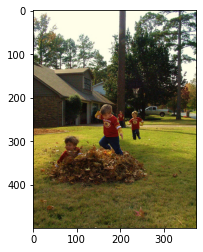

In [35]:
# To know the shape of images
def image_and_shapes(image):
  img= plt.imread(image)
  plt.imshow(img)
  print("Shape of the image:{}".format(img.shape))

image_and_shapes("/content/Flickr8k_Dataset/1956678973_223cb1b847.jpg")

Shape after resize : (224, 224, 3)


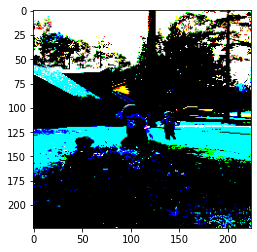

In [36]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = preprocess_input(img)
    return img, image_path

img1,img1_path = load_image("/content/Flickr8k_Dataset/1956678973_223cb1b847.jpg")
print("Shape after resize :", img1.shape)
plt.imshow(img1)

## Load pretrained CNN model

In [37]:
import tensorflow as tf
modelvgg = tf.keras.applications.VGG16(include_top=True,weights=None) # for observation on shapes

In [38]:
modelvgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [39]:
image_model = tf.keras.applications.VGG16(include_top=False,weights='imagenet')
new_input = image_model.input # Any arbitrary shapes with 3 channels
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

58889256/58889256 [==============================] - 0s 0us/step


In [40]:
image_features_extract_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [41]:
# Get unique images
encode_train = sorted(set(img_name_vector))
print(encode_train[:10])

['/content/Flickr8k_Dataset//1000268201_693b08cb0e.jpg', '/content/Flickr8k_Dataset//1001773457_577c3a7d70.jpg', '/content/Flickr8k_Dataset//1002674143_1b742ab4b8.jpg', '/content/Flickr8k_Dataset//1003163366_44323f5815.jpg', '/content/Flickr8k_Dataset//1007129816_e794419615.jpg', '/content/Flickr8k_Dataset//1007320043_627395c3d8.jpg', '/content/Flickr8k_Dataset//1009434119_febe49276a.jpg', '/content/Flickr8k_Dataset//1012212859_01547e3f17.jpg', '/content/Flickr8k_Dataset//1015118661_980735411b.jpg', '/content/Flickr8k_Dataset//1015584366_dfcec3c85a.jpg']


In [42]:
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
for files in image_dataset: 
    print(files.numpy())

Streaming output truncated to the last 5000 lines.
b'/content/Flickr8k_Dataset//2844747252_64567cf14a.jpg'
b'/content/Flickr8k_Dataset//2844846111_8c1cbfc75d.jpg'
b'/content/Flickr8k_Dataset//2844963839_ff09cdb81f.jpg'
b'/content/Flickr8k_Dataset//2845246160_d0d1bbd6f0.jpg'
b'/content/Flickr8k_Dataset//2845691057_d4ab89d889.jpg'
b'/content/Flickr8k_Dataset//2845845721_d0bc113ff7.jpg'
b'/content/Flickr8k_Dataset//2846037553_1a1de50709.jpg'
b'/content/Flickr8k_Dataset//2846785268_904c5fcf9f.jpg'
b'/content/Flickr8k_Dataset//2846843520_b0e6211478.jpg'
b'/content/Flickr8k_Dataset//2847514745_9a35493023.jpg'
b'/content/Flickr8k_Dataset//2847615962_c330bded6e.jpg'
b'/content/Flickr8k_Dataset//2847859796_4d9cb0d31f.jpg'
b'/content/Flickr8k_Dataset//2848266893_9693c66275.jpg'
b'/content/Flickr8k_Dataset//2848571082_26454cb981.jpg'
b'/content/Flickr8k_Dataset//2848895544_6d06210e9d.jpg'
b'/content/Flickr8k_Dataset//2848977044_446a31d86e.jpg'
b'/content/Flickr8k_Dataset//2849194983_2968c72832.jp

In [43]:
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(64)

In [44]:
image_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [45]:
from tqdm import tqdm

- An NPY file is a NumPy array file created by the Python software package with the NumPy library installed. It contains an array saved in the NumPy (NPY) file format. NPY files store all the information required to reconstruct an array on any computer, which includes dtype and shape information.


In [46]:
for img, path in tqdm(image_dataset):
   batch_features = image_features_extract_model(img)
   batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))
   for bf, p in zip(batch_features, path):
     path_of_feature = p.numpy().decode("utf-8")
     np.save(path_of_feature, bf.numpy())

100%|██████████| 127/127 [01:21<00:00,  1.55it/s]


In [47]:
np_img =np.load('/content/Flickr8k_Dataset/997722733_0cb5439472.jpg.npy')

In [48]:
print(np_img)
print("Shape : {}".format(np_img.shape))

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.9050984  ...  0.          0.76567334
  10.604572  ]
 [ 0.          0.         17.902939   ...  0.          0.
   7.7830253 ]
 [ 0.          0.         18.57191    ...  0.          0.
   0.        ]]
Shape : (49, 512)


## Tokenize captions

Data Preparation for a Language Generation(RNN) DECODER
- We will perform a few basic pre-processing steps on the captions such as:
  1. First, we will tokenize the captions. This will help us to build a vocabulary of all the unique words in the data.
  2. Next, we will limit the vocabulary size to top 5000 words to save memory. We will replace all the other words with the token < unk > (for words not in vocabulary) . You , can obviously optimize that according to the use cases.
  3. Finally, we will create a word->index mapping and vice versa.
  4. We will pad all sequences to be the same length as the longest one. 

In [49]:
def tokenize_caption(top_k,train_captions):
  # Choose the top 5000 words from the vocabulary
  tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,oov_token="<unk>",filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
  # oov_token: if given, it will be added to word_index and used to replace out-of-vocabulary words during text_to_sequence calls
  
  tokenizer.fit_on_texts(train_captions)
  train_seqs = tokenizer.texts_to_sequences(train_captions)

  # Map '<pad>' to '0'
  tokenizer.word_index['<pad>'] = 0
  tokenizer.index_word[0] = '<pad>'


  # Create the tokenized vectors
  train_seqs = tokenizer.texts_to_sequences(train_captions)
  return train_seqs, tokenizer

train_seqs , tokenizer = tokenize_caption(5000,train_captions)

In [50]:
# Find the maximum length of any caption in our dataset
def calc_max_length(tensor):
    return max(len(t) for t in tensor)
# Calculates the max_length, which is used to store the attention weights
max_length = calc_max_length(train_seqs)

In [51]:
def calc_min_length(tensor):
    return min(len(t) for t in tensor)
# Calculates the max_length, which is used to store the attention weights
min_length = calc_min_length(train_seqs)

In [52]:
print('Max Length of any caption : Min Length of any caption = '+ str(max_length) +" : "+str(min_length))

Max Length of any caption : Min Length of any caption = 33 : 2


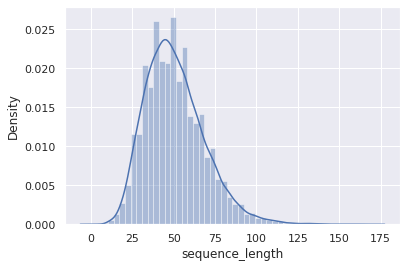

In [53]:
import seaborn as sns

df=pd.DataFrame()
df["sequence_length"] = data["caption"].apply(len)

sns.set()
distribution = sns.distplot(df["sequence_length"])

Pad each vector to the max_length of the captions, so that all caption vectors are of same length

In [54]:
def padding_train_sequences(train_seqs,max_length,padding_type):
  cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding=padding_type,maxlen=max_length)
  return cap_vector

In [55]:
padded_caption_vector = padding_train_sequences(train_seqs,max_length,'post')
print(padded_caption_vector.shape)

(40000, 33)


In [56]:

padded_caption_vector

array([[  2, 184,  62, ...,   0,   0,   0],
       [  2,  11, 588, ...,   0,   0,   0],
       [  2,  14,   9, ...,   0,   0,   0],
       ...,
       [  2,  19,   4, ...,   0,   0,   0],
       [  2,  16,   4, ...,   0,   0,   0],
       [  2, 153,   9, ...,   0,   0,   0]], dtype=int32)

## Split into train and testing

In [57]:

# Create training and test set using an 80-20 split
img_name_train, img_name_test, caption_train, caption_test = train_test_split(img_name_vector,padded_caption_vector,test_size=0.2,random_state=0)

In [58]:
print("Training Data : X = {0},Y = {1}".format(len(img_name_train), len(caption_train)))
print("Test Data : X = {0},Y = {1}".format(len(img_name_test), len(caption_test)))

Training Data : X = 32000,Y = 32000
Test Data : X = 8000,Y = 8000


In [59]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000

In [60]:
def load_npy(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8')+'.npy')
  return img_tensor, cap

In [61]:
def create_dataset(img_name_train,caption_train):

  
  dataset = tf.data.Dataset.from_tensor_slices((img_name_train, caption_train))

  # Use map to load the numpy files in parallel
  dataset = dataset.map(lambda item1, item2: tf.numpy_function(load_npy, [item1, item2], [tf.float32, tf.int32]),num_parallel_calls=tf.data.experimental.AUTOTUNE)

  # Shuffle and batch
  dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
  return dataset

In [62]:

# Creating train and test dataset
dataset = create_dataset(img_name_train,caption_train)
test_dataset = create_dataset(img_name_test,caption_test)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [63]:
embedding_dim = 256
units = 512
vocab_size = len(tokenizer.word_index) + 1 #8329
num_steps = len(img_name_train) // BATCH_SIZE  #500
EPOCHS = 20
# Shape from last layer of VGG-16 :(7,7,512)
# So, say there are 49 pixel locations now and each pixel is 512 dimensional
features_shape = 512
attention_features_shape = 49

## Define model classes

In [64]:
class VGG16_Encoder(tf.keras.Model):
    # This encoder passes the features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(VGG16_Encoder, self).__init__()
        # shape after fc == (batch_size, 49, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)
        self.dropout = tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None)

    def call(self, x):
        #x= self.dropout(x)
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

In [65]:
def rnn_type(units):
  # If you have a GPU, we recommend using CuDNNGRU(provides a 3x speedup than GRU)
  # the code automatically does that.
    if tf.test.is_gpu_available():
        return tf.compat.v1.keras.layers.CuDNNLSTM(units, 
                                        return_sequences=True, 
                                        return_state=True, 
                                        recurrent_initializer='glorot_uniform')
    else:
        return tf.keras.layers.GRU(units, 
                                   return_sequences=True, 
                                   return_state=True, 
                                   recurrent_activation='sigmoid', 
                                   recurrent_initializer='glorot_uniform')

In [66]:
class Rnn_Local_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(Rnn_Local_Decoder, self).__init__()
    self.units = units

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    #self.gru = tf.keras.layers.GRU(self.units,
    #                               return_sequences=True,
    #                               return_state=True,
    #                               recurrent_initializer='glorot_uniform')
    self.gru = tf.keras.layers.LSTM(self.units,kernel_initializer="glorot_uniform",return_sequences=True,return_state=True)
    
    self.fc1 = tf.keras.layers.Dense(self.units)

    self.dropout = tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None)
    self.batchnormalization = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

    self.fc2 = tf.keras.layers.Dense(vocab_size)

    # Implementing Attention Mechanism 
    self.Uattn = tf.keras.layers.Dense(units)
    self.Wattn = tf.keras.layers.Dense(units)
    self.Vattn = tf.keras.layers.Dense(1)
    


  def call(self, x, features, hidden):
    
    # features shape ==> (64,49,256) ==> Output from ENCODER
    
    # hidden shape == (batch_size, hidden_size) ==>(64,512)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size) ==> (64,1,512)
    
    hidden_with_time_axis = tf.expand_dims(hidden, 1)
    
    # score shape == (64, 49, 1)
    # Attention Function
    '''e(ij) = f(s(t-1),h(j))'''
    ''' e(ij) = Vattn(T)*tanh(Uattn * h(j) + Wattn * s(t))'''
    score = self.Vattn(tf.nn.tanh(self.Uattn(features) + self.Wattn(hidden_with_time_axis)))
    # self.Uattn(features) : (64,49,512)
    # self.Wattn(hidden_with_time_axis) : (64,1,512)
    # tf.nn.tanh(self.Uattn(features) + self.Wattn(hidden_with_time_axis)) : (64,49,512)
    # self.Vattn(tf.nn.tanh(self.Uattn(features) + self.Wattn(hidden_with_time_axis))) : (64,49,1) ==> score
    # you get 1 at the last axis because you are applying score to self.Vattn
    
    
    # Then find Probability using Softmax
    '''attention_weights(alpha(ij)) = softmax(e(ij))'''
    attention_weights = tf.nn.softmax(score, axis=1)
    # attention_weights shape == (64, 49, 1)

    
    # Give weights to the different pixels in the image
    ''' C(t) = Summation(j=1 to T) (attention_weights * VGG-16 features) ''' 
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)
    # Context Vector(64,256) = AttentionWeights(64,49,1) * features(64,49,256)
    # context_vector shape after sum == (64, 256)
    
    
    # x shape after passing through embedding == (64, 1, 256)
    x = self.embedding(x)
    
    # x shape after concatenation == (64, 1,  512)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state, c_state= self.gru(x)

    # shape == (batch_size, max_length, hidden_size)
    x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
    x = tf.reshape(x, (-1, x.shape[2]))

    # Adding Dropout and BatchNorm Layers
    x= self.dropout(x)
    x= self.batchnormalization(x)
    # output shape == (64 * 512)
    x = self.fc2(x)
    # shape : (64 * 8329(vocab))
    return x, state, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

In [67]:
def call(self, x, features, hidden):
     
    hidden_with_time_axis = tf.expand_dims(hidden, 1)
    score = self.Vattn(tf.nn.tanh(self.Uattn(features) + self.Wattn(hidden_with_time_axis)))
    attention_weights = tf.nn.softmax(score, axis=1)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)
    x = self.embedding(x)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
    output, state, c_state= self.gru(x)
    x = self.fc1(output)

    x = tf.reshape(x, (-1, x.shape[2]))

    x= self.dropout(x)
    x= self.batchnormalization(x)
    x = self.fc2(x)
    # shape : (64 * 8329(vocab))
    return x, state, attention_weights


In [68]:

encoder = VGG16_Encoder(embedding_dim)
decoder = Rnn_Local_Decoder(embedding_dim, units, vocab_size)

In [69]:
class VGG16_LSTM_model:
    def __init__(self,embedding_dim, units, vocab_size, img_tensor):
        super().__init__()
        # encoder doesn't need any params to specify
        self.encoder = VGG16_Encoder(embedding_dim)
        # decoder params need to be specified
        self.decoder = Rnn_Local_Decoder(
            embedding_dim = embedding_dim,
            units = units,
            vocab_size = vocab_size
        )
    
    def call(self, img_tensor, dec_input):
        features = self.encoder(img_tensor)
        predictions, hidden, _ = decoder(dec_input, features, hidden)
        return predictions, hidden, _



In [70]:
def Encoder_features(img_tensor, target):
   features = encoder(img_tensor)
   return features,target,img_tensor

for (batch, (img_tensor, target)) in enumerate(dataset):
  features,target,img_tensor= Encoder_features(img_tensor, target)

In [71]:
target.shape # (batch_size,max_length)

TensorShape([64, 33])

In [72]:
img_tensor.shape #(batch_size,attention_feature_shape,feature_shape)

TensorShape([64, 49, 512])

In [73]:
features.shape #(batch_size,attention_feature_shape,feature_shape)

TensorShape([64, 49, 256])

In [74]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [75]:
# import shutil
# shutil.rmtree('/content/drive/MyDrive/Colab Notebooks/Image Captioning Attention/Check_Point/cp-{epoch:04d}.ckpt/')

In [76]:
checkpoint_path_ckpt = "/content/drive/MyDrive/Colab Notebooks/Image Captioning Attention/Check_Point/cp-{epoch:04d}.ckpt"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path_ckpt, max_to_keep=5)

In [77]:
ckpt.restore(ckpt_manager.latest_checkpoint)
if ckpt_manager.latest_checkpoint:
    print("Restored from {}".format(ckpt_manager.latest_checkpoint))
else:
    print("Initializing from scratch.")


Restored from /content/drive/MyDrive/Colab Notebooks/Image Captioning Attention/Check_Point/cp-{epoch:04d}.ckpt/ckpt-4


In [78]:
# start_epoch = 0
# if ckpt_manager.latest_checkpoint:
#   start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [79]:

# Clear previous logs
!rm -rf ./logs/

In [80]:

# Define our metrics
train_loss = tf.keras.metrics.Mean('train_loss', dtype=tf.float32)
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('train_accuracy')

In [81]:
import datetime
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
test_log_dir = 'logs/gradient_tape/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)

In [82]:
final_model = VGG16_LSTM_model(embedding_dim=embedding_dim, units=units, vocab_size=vocab_size, img_tensor=img_tensor)


In [83]:
final_encoder = final_model.encoder
final_decoder = final_model.decoder

## Training
embedding_dim = 256
units = 512
vocab_size = len(tokenizer.word_index) + 1 #8329
num_steps = len(img_name_train) // BATCH_SIZE  #500
EPOCHS = 20
# Shape from last layer of VGG-16 :(7,7,512)
# So, say there are 49 pixel locations now and each pixel is 512 dimensional
features_shape = 512
attention_features_shape = 49

Run this

In [ ]:
loss_plot = []

@tf.function
def train_step(img_tensor, target):
  loss = 0

  # initializing the hidden state for each batch
  # because the captions are not related from image to image
  hidden = decoder.reset_state(batch_size=target.shape[0])

  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * BATCH_SIZE, 1)

  with tf.GradientTape() as tape:
      #features = encoder(img_tensor)
      features = encoder(img_tensor)
      for i in range(1, target.shape[1]):
          # passing the features through the decoder
          
          predictions, hidden, _ = decoder(dec_input, features, hidden)

          loss += loss_function(target[:, i], predictions)

          # using teacher forcing
          dec_input = tf.expand_dims(target[:, i], 1)
          

  total_loss = (loss / int(target.shape[1]))

  trainable_variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))

  #train_loss(loss)
  #train_accuracy(target, predictions)

  return loss, total_loss

Run this

In [ ]:
test_loss_plot = []

@tf.function
def test_step(img_tensor, target):
  loss = 0

  # initializing the hidden state for each batch
  # because the captions are not related from image to image
  hidden = decoder.reset_state(batch_size=target.shape[0])

  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * BATCH_SIZE, 1)

  features = encoder(img_tensor)

  for i in range(1, target.shape[1]):
      # passing the features through the decoder

      
      predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
      # predictions : (64,8329)
      loss += loss_function(target[:, i], predictions)
      
      predicted_id = tf.argmax(predictions[0])
      dec_input = tf.expand_dims([predicted_id]*BATCH_SIZE, 1)
 

  total_loss = (loss / int(target.shape[1]))

  return loss, total_loss

In [ ]:
for epoch in range(start_epoch, 20):
  start = time.time()

    #For Train
    #================================================================
  total_loss_train = 0
  for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss_train += t_loss
    # storing the epoch end loss value to plot later
  loss_plot.append(total_loss_train / num_steps)

    # Tensorboard 
  with train_summary_writer.as_default():
      tf.summary.scalar('LossPlotTrain', (total_loss_train/ num_steps), step=epoch)
      tf.summary.scalar('Train_loss', train_loss.result(), step=epoch)

    #For Test
    #================================================================
  total_loss_test = 0
  for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss_test += t_loss
    # storing the epoch end loss value to plot later
  test_loss_plot.append(total_loss_test / num_steps) 

    # Tensorboard 
  with test_summary_writer.as_default():
    tf.summary.scalar('LossPlotTest', (total_loss_test/ num_steps), step=epoch)

    
  if epoch % 5 == 0:
    ckpt_manager.save()


  print ('Epoch {} TrainLoss {:.6f} TestLoss {:.6f}'.format(epoch + 1,(total_loss_train/num_steps),(total_loss_test/num_steps)))
  print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
 

Epoch 1 TrainLoss 1.504927 TestLoss 0.499579
Time taken for 1 epoch 141.8513743877411 sec

Epoch 2 TrainLoss 1.136727 TestLoss 0.487264
Time taken for 1 epoch 69.61315441131592 sec

Epoch 3 TrainLoss 1.019157 TestLoss 0.498044
Time taken for 1 epoch 68.52839469909668 sec

Epoch 4 TrainLoss 0.935923 TestLoss 0.529314
Time taken for 1 epoch 68.19651055335999 sec

Epoch 5 TrainLoss 0.867925 TestLoss 0.511812
Time taken for 1 epoch 68.19662165641785 sec

Epoch 6 TrainLoss 0.808920 TestLoss 0.532735
Time taken for 1 epoch 68.32366180419922 sec

Epoch 7 TrainLoss 0.755694 TestLoss 0.551448
Time taken for 1 epoch 68.3397536277771 sec

Epoch 8 TrainLoss 0.707372 TestLoss 0.552337
Time taken for 1 epoch 68.25782704353333 sec

Epoch 9 TrainLoss 0.663607 TestLoss 0.576481
Time taken for 1 epoch 67.78509736061096 sec

Epoch 10 TrainLoss 0.624862 TestLoss 0.597486
Time taken for 1 epoch 67.85315823554993 sec

Epoch 11 TrainLoss 0.589110 TestLoss 0.604802
Time taken for 1 epoch 67.97963380813599 sec

In [ ]:
ckpt_manager.checkpoint

In [ ]:
/content/drive/MyDrive/Colab Notebooks/Image Captioning Attention/Check_Point/cp-{epoch:04d}.ckpt

## Greedy Approach

In [84]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0) # Start token is <start> for LSTM
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()
        result.append(tokenizer.index_word[predicted_id]) # Store the result or word predicted

        if tokenizer.index_word[predicted_id] == '<end>': # if you reach <end> token then return the result
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0) # Decoder input is the word predicted at previous timestep

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

/content/Flickr8k_Dataset/3564436847_57825db87d.jpg
Real Caption: boy in red shirt riding skateboard quickly down the road
Prediction Caption: boy in red shirt and white shorts and checkered skateboard down the road
BELU score: 50.63696835418333


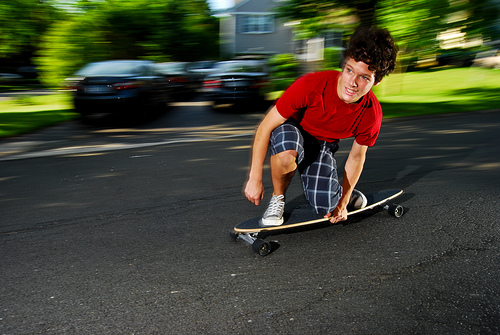

In [85]:
# captions on the training set

from PIL import Image

from nltk.translate.bleu_score import sentence_bleu

rid = np.random.randint(0, len(img_name_train))
image = '/content/Flickr8k_Dataset/3564436847_57825db87d.jpg'

print(image)
real_caption = '<start> boy in red shirt riding skateboard quickly down the road <end>'
result, attention_plot = evaluate(image)

first = real_caption.split(' ', 1)[1]
real_caption = first.rsplit(' ', 1)[0]

#remove "<unk>" in result
for i in result:
    if i=="<unk>":
        result.remove(i)


#remove <end> from result         
result_join = ' '.join(result)
result_final = result_join.rsplit(' ', 1)[0]

print ('Real Caption:', real_caption)
print ('Prediction Caption:', result_final)



# Calculate Bleu score
real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = result_final.split()
score = sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0))
print(f"BLEU score: {score*100}")

# opening the image
Image.open('/content/Flickr8k_Dataset/3564436847_57825db87d.jpg')

In [88]:
# captions on the validation set

from PIL import Image

from nltk.translate.bleu_score import sentence_bleu

rid = np.random.randint(0, len(img_name_train))
for i in range(3):
  image = img_name_train[rid]
  print(image)
  real_caption = ' '.join([tokenizer.index_word[i] for i in caption_train[rid] if i not in [0]])
  result, attention_plot = evaluate(image)

  first = real_caption.split(' ', 1)[1]
  real_caption = first.rsplit(' ', 1)[0]

  #remove "<unk>" in result
  for i in result:
      if i=="<unk>":
          result.remove(i)


  #remove <end> from result         
  result_join = ' '.join(result)
  result_final = result_join.rsplit(' ', 1)[0]

  print ('Real Caption:', real_caption)
  print ('Prediction Caption:', result_final)



  # Calculate Bleu score
  real_appn = []
  real_appn.append(real_caption.split())
  reference = real_appn
  candidate = result_final.split()
  score = sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0))
  print(f"BLEU score: {score*100}")

  # opening the image
  Image.open(img_name_train[rid])

/content/Flickr8k_Dataset//2631625732_75b714e685.jpg
Real Caption: three men kayaking with mountains in the background
Prediction Caption: three people in the background
BELU score: 34.70989552921196
/content/Flickr8k_Dataset//2631625732_75b714e685.jpg
Real Caption: three men kayaking with mountains in the background
Prediction Caption: three people in the background
BELU score: 34.70989552921196
/content/Flickr8k_Dataset//2631625732_75b714e685.jpg
Real Caption: three men kayaking with mountains in the background
Prediction Caption: three people in the background
BELU score: 34.70989552921196


/content/Flickr8k_Dataset//3353400143_8b9543f7dc.jpg
Real Caption: motorcyclist in yellow and white rides his bike
Prediction Caption: man in yellow outfit riding yellow motorcycle
BLEU score: 18.916826637569276


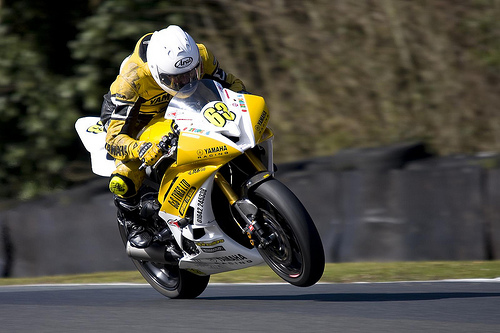

In [119]:
# captions on the validation set

from PIL import Image

from nltk.translate.bleu_score import sentence_bleu

rid = np.random.randint(0, len(img_name_test))
image = img_name_test[rid]
print(image)
real_caption = ' '.join([tokenizer.index_word[i] for i in caption_test[rid] if i not in [0]])
result, attention_plot = evaluate(image)

first = real_caption.split(' ', 1)[1]
real_caption = first.rsplit(' ', 1)[0]

#remove "<unk>" in result
for i in result:
    if i=="<unk>":
        result.remove(i)


#remove <end> from result         
result_join = ' '.join(result)
result_final = result_join.rsplit(' ', 1)[0]

print ('Real Caption:', real_caption)
print ('Prediction Caption:', result_final)



# Calculate Bleu score
real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = result_final.split()
score = sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0))
print(f"BLEU score: {score*100}")

# opening the image
Image.open(img_name_test[rid])

## Beam Search

In [120]:
def evaluate(image, beam_index):

    start = [tokenizer.word_index['<start>']]
    
    # result[0][0] = index of the starting word
    # result[0][1] = probability of the word predicted
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(result[0][0]) < max_length:
        i=0
        temp = []
        for s in result:

          predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

          attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
          i=i+1
          # Getting the top <beam_index>(n) predictions
          word_preds = np.argsort(predictions[0])[-beam_index:]
          
          # creating a new list so as to put them via the model again
          for w in word_preds:       
            next_cap, prob = s[0][:], s[1]
            next_cap.append(w)
            prob += predictions[0][w]
            temp.append([next_cap, prob])
        result = temp
        # Sorting according to the probabilities
        result = sorted(result, reverse=False, key=lambda l: l[1])
        # Getting the top words
        result = result[-beam_index:]
        
        predicted_id = result[-1] # with Max Probability
        pred_list = predicted_id[0]
        
        prd_id = pred_list[-1] 
        if(prd_id!=3):
          dec_input = tf.expand_dims([prd_id], 0)  # Decoder input is the word predicted with highest probability among the top_k words predicted
        else:
          break

    result = result[-1][0]
    
    intermediate_caption = [tokenizer.index_word[i] for i in result]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
            
        else:
            break

    final_caption = ' '.join(final_caption[1:])
    return final_caption,attention_plot

/content/Flickr8k_Dataset//3621647714_fc67ab2617.jpg
first man standing near mountain range <end>
result man standing on clear mountains range
BLEU score: 31.6227766016838
Real Caption: man standing near mountain range
Prediction Caption(Beam=7): man standing on clear mountains range
time took to Predict: 1 sec


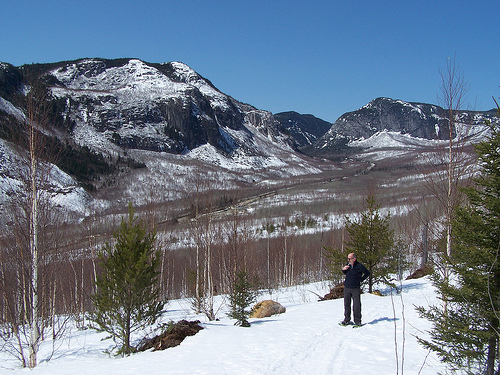

In [121]:
# captions on the validation set

from PIL import Image

from nltk.translate.bleu_score import sentence_bleu

rid = np.random.randint(0, len(img_name_train))
image = img_name_train[rid]
print(image)
start = time.time()
real_caption = ' '.join([tokenizer.index_word[i] for i in caption_train[rid] if i not in [0]])
result, attention_plot = evaluate(image, 7)



first = real_caption.split(' ', 1)[1]
real_caption = first.rsplit(' ', 1)[0]

print('first',first)
print('result', result)
#remove "<unk>" in result
for i in result:
    if i=="<unk>":
        result.remove(i)


#remove <end> from result         

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = result.split()

score = sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0))
print(f"BLEU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption(Beam=7):', result)


print(f"time took to Predict: {round(time.time()-start)} sec")
# opening the image
Image.open(img_name_train[rid])

/content/Flickr8k_Dataset/413231421_43833a11f5.jpg
first black dog is digging in the snow <end>
result the black dog in winter snow
BLEU score: 34.55747170954952
Real Caption: black dog is digging in the snow
Prediction Caption(Beam=7): the black dog in winter snow
time took to Predict: 5 sec


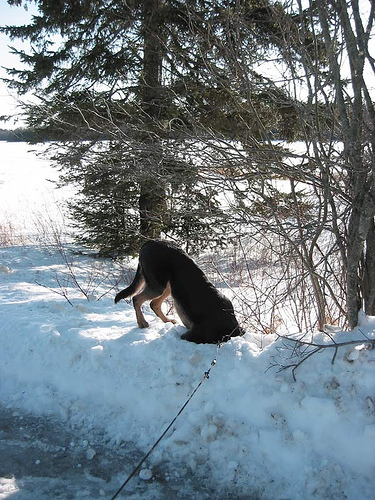

In [139]:
# captions on the validation set

from PIL import Image

from nltk.translate.bleu_score import sentence_bleu

rid = np.random.randint(0, len(img_name_test))
image = '/content/Flickr8k_Dataset/413231421_43833a11f5.jpg'
print(image)
start = time.time()
real_caption = '<start> black dog is digging in the snow <end>'
result, attention_plot = evaluate(image, 7)
# result is in this format:  ['woman', 'plays', 'volleyball', '<end>']
# We need to remove <end> and join the list elements into a sentence. Also we need to remove <unk> from real_captions


first = real_caption.split(' ', 1)[1]
real_caption = first.rsplit(' ', 1)[0]

print('first',first)
print('result', result)
#remove "<unk>" in result
for i in result:
    if i=="<unk>":
        result.remove(i)


#remove <end> from result         

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = result.split()

score = sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0))
print(f"BLEU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption(Beam=7):', result)


print(f"time took to Predict: {round(time.time()-start)} sec")
# opening the image
Image.open('/content/Flickr8k_Dataset/413231421_43833a11f5.jpg')